In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 2.3 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -1
MAX_VALUE = 1
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np
def sumPowell(x):
  sumY = 0
  for index, xValue in enumerate(x, 1):    
    absX = np.absolute(xValue) 
    powerX = np.power(xValue, index + 1)
    sumY += powerX   
  return (sumY,)
  #return (sum(x),)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", sumPowell)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg   	std     	min      	max    
0  	30    	1.1338	0.799215	-0.834802	2.88095
1  	175   	0.651951	0.695996	-0.834802	1.76089
2  	181   	-0.0660015	0.746227	-1.88704 	1.26341
3  	181   	-0.801367 	0.834586	-2.44889 	0.540141
4  	180   	-1.49821  	0.999205	-3.29903 	0.103358
5  	186   	-2.27674  	0.672873	-3.29903 	-0.732363
6  	176   	-2.7237   	0.424926	-3.59486 	-1.82699 
7  	180   	-3.34923  	0.320087	-4.02391 	-2.90307 
8  	178   	-3.7919   	0.262521	-4.46195 	-3.12387 
9  	179   	-34.8663  	165.577 	-926.525 	-3.75284 
10 	178   	-127.415  	313.434 	-926.525 	-3.84625 
11 	176   	-367.598  	445.277 	-926.525 	-4.53621 
12 	180   	-761.177  	340.863 	-927.315 	-4.74666 
13 	175   	-994.746  	201.563 	-1670.35 	-926.525 
14 	185   	-1097.43  	300.013 	-1670.35 	-926.525 
15 	184   	-1396.54  	346.15  	-1671.82 	-927.281 
16 	181   	-1763.54  	605.927 	-4954.19 	-976.401 
17 	189   	-1793.36  	587.341 	-4954.19 	-1670.35 
18 	177   	-2025.46  	976.589 	-4954.97 	-1670.35 


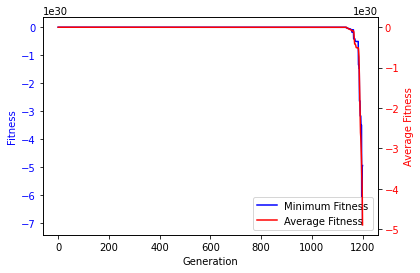

Best individual is Individual('d', [0.807498450505837, -4.45897056458654, 0.3648561494606416, -43.41125415318034, -0.21833768218149485, -25525.66847856502, -0.26365973313561625, -573.0228288979321, -2.5538575737043563, 0.10743639363763643]), fitness: (-7.060578415025722e+30,)
gen	nevals	avg     	std    	min     	max    
0  	30    	0.692129	0.73808	-1.25204	1.87069
1  	182   	-0.0276246	0.790378	-1.25204	1.34709
2  	178   	-0.872441 	0.600518	-1.63524	0.495653
3  	168   	-1.29163  	0.246693	-2.23338	-0.974525
4  	184   	-1.57804  	0.374372	-2.37734	-0.888909
5  	183   	-2.05824  	0.630798	-4.3481 	-1.33199 
6  	183   	-2.99861  	2.37233 	-15.2783	-1.79526 
7  	180   	-4.96809  	4.1202  	-15.288 	-2.42716 
8  	175   	-5.96878  	4.24174 	-15.288 	-2.31298 
9  	178   	-10.1739  	5.56054 	-16.9348	-3.06001 
10 	184   	-15.1236  	4.27906 	-23.2903	-4.74589 
11 	183   	-17.7434  	1.86401 	-23.3   	-15.3892 
12 	181   	-19.9833  	2.36989 	-25.7944	-16.6163 
13 	184   	-54.386   	171.818 	-979.

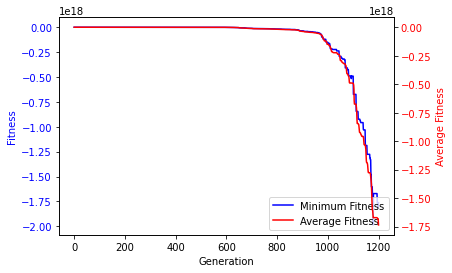

Best individual is Individual('d', [1.099443282959353, -92.94653573815519, 0.27920251939273755, -9.92169533102434, 0.4030117411502924, -105.40481327945255, 1.0847989504541533, -109.67967479495925, -0.06367166465094956, -2.274521790433017]), fitness: (-2.297009111521235e+18,)
gen	nevals	avg     	std     	min     	max    
0  	30    	0.823039	0.873122	-1.10747	3.10169
1  	186   	-0.300345	2.72995 	-14.7668	1.13287
2  	176   	-0.682144	2.65217 	-14.7668	0.631503
3  	175   	-0.555183	0.371992	-1.15107	0.320011
4  	182   	-0.929443	0.476138	-2.66185	-0.310909
5  	185   	-1.37803 	0.616459	-2.66185	-0.780037
6  	181   	-2.36786 	1.98468 	-12.4636	-0.926771
7  	184   	-4.07248 	3.4832  	-14.0971	-1.95623 
8  	176   	-7.50283 	4.81846 	-14.2407	-2.66185 
9  	187   	-12.1531 	3.72643 	-16.0533	-4.21958 
10 	182   	-14.8917 	0.931613	-16.0533	-12.4302 
11 	181   	-15.896  	1.2072  	-20.1086	-14.0971 
12 	175   	-17.1528 	3.19956 	-31.7891	-15.4436 
13 	180   	-24.2912 	27.5346 	-170.957	-15.6058 

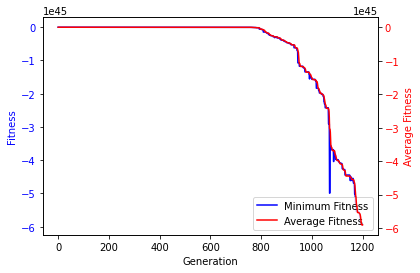

Best individual is Individual('d', [-3.114572626942422, -8.464279692718835, -0.442419495698739, -2.1234041795545053, 0.5313924268672567, -18.285278742829988, 1.1757911582095417, -3.723226649044994, 1.0194409161562463, -14648.52373909708]), fitness: (-6.663961070110277e+45,)
gen	nevals	avg     	std     	min     	max    
0  	30    	0.672513	0.887361	-1.38127	2.70743
1  	173   	-0.104513	0.611934	-1.47514	0.832537
2  	178   	-0.404674	0.540396	-1.56462	0.555491
3  	181   	-1.12966 	0.752434	-4.46433	-0.23774
4  	174   	-1.9229  	1.34997 	-4.64446	-0.595203
5  	181   	-3.28795 	1.44756 	-5.26746	-1.16628 
6  	177   	-4.85892 	3.92283 	-18.8073	-1.21837 
7  	177   	-8.46447 	6.26282 	-18.8073	-2.18581 
8  	178   	-15.47   	13.7848 	-80.7058	-4.6179  
9  	175   	-19.5949 	12.0743 	-80.7795	-5.04003 
10 	179   	-29.3952 	22.9556 	-80.7275	-18.8073 
11 	183   	-49.7321 	30.424  	-81.1861	-18.9426 
12 	178   	-70.3778 	22.756  	-81.3156	-19.2967 
13 	185   	-79.0834 	10.8669 	-81.7189	-20.5785 

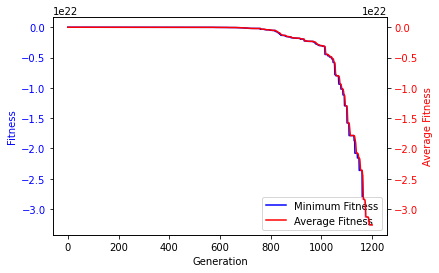

Best individual is Individual('d', [-0.13720178101611874, -0.936225766404261, -0.5240856283750265, -60.56657953315652, 1.416241871686543, -64.20231645596319, 0.34265136812749897, -61.65183561290486, 1.0002884681746596, -112.55105177442219]), fitness: (-3.671514839159655e+22,)
gen	nevals	avg     	std     	min     	max   
0  	30    	0.870044	0.909859	-1.07752	2.9007
1  	180   	0.161229	0.531911	-1.38639	1.10255
2  	171   	-1.46782	4.51448 	-18.2648	0.810952
3  	185   	-4.5592 	7.23754 	-19.3289	-0.0449881
4  	178   	-22.9577	77.7352 	-439.119	-0.278595 
5  	184   	-15.8061	5.96995 	-20.7922	-0.561617 
6  	189   	-20.8881	2.72772 	-34.7637	-18.2652  
7  	185   	-23.5221	5.03465 	-34.7637	-18.5907  
8  	175   	-24.5945	4.84331 	-34.6489	-21.0436  
9  	176   	-117.648	489.125 	-2751.5 	-22.2423  
10 	184   	-488.877	1012.78 	-2756.25	-23.3685  
11 	182   	-1398.94	1356.61 	-2766.43	-34.497   
12 	181   	-2076.86	1150.12 	-2884   	-34.7637  
13 	177   	-2774.32	36.8895 	-2884.12	-2751.73  
1

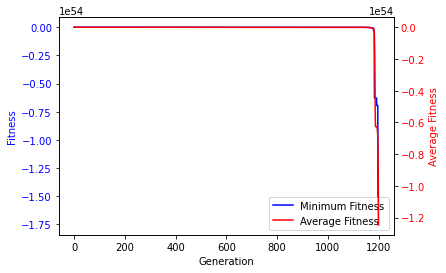

Best individual is Individual('d', [-0.7280792722063945, -28.605100249586357, -1.366354783939459, -1.6516255939911955, -4.614307908952653, -114.76603114653841, -1.414388300216795, -1269026.6458409508, -0.4144596279179825, -0.19603195174404897]), fitness: (-8.535651398604407e+54,)


In [10]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show() 

    print("Best individual is %s, fitness: %s" % (hof[0], hof[0].fitness.values))


    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(5):
       main()